## Import

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
sns.set()

## HELPER FUNCTION

We will use this function to convert PPP dollar input to percentile of world income (circa 2013)

In [4]:
percentiles = pd.read_csv('figure5data.csv')

In [5]:
percentiles.drop(percentiles.tail(1).index,inplace=True)

In [6]:
def get_percentile(income):
  for j in range(len(percentiles)):
    if percentiles['midpoint'].iloc[j] > income:
      return(percentiles.iloc[j]['c2013'])

Example use, confirmation it works:

In [7]:
get_percentile(10000)

84.3856327945172

## Explore

In [8]:
df = pd.read_csv('wyd_88_05_for_release.csv')

All the countries for which we have data:

In [9]:
df['contcod'].unique()

array(['AGO', 'ALB', 'ANT', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE',
       'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGD-R', 'BGD-U', 'BGR', 'BIH',
       'BLR', 'BOL', 'BRA', 'BRB', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE',
       'CHL', 'CHN', 'CHN-R', 'CHN-U', 'CIV', 'CMR', 'COG', 'COL', 'COM',
       'CPV', 'CRI', 'CYP', 'CZE', 'DDR', 'DEU', 'DJI', 'DNK', 'DOM',
       'DZA', 'ECU', 'ECU-U', 'EGY', 'EGY-R', 'EGY-U', 'ESP', 'EST',
       'ETH', 'FIN', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB',
       'GNB', 'GRC', 'GTM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN',
       'IDN', 'IDN-R', 'IDN-U', 'IND', 'IND-R', 'IND-U', 'IRL', 'IRN',
       'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM',
       'KOR', 'LAO', 'LBR', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAR',
       'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MNE', 'MNG', 'MNG-R', 'MNG-U',
       'MOZ', 'MRT', 'MWI', 'MYS', 'NAM', 'NER', 'NER-R', 'NER-U', 'NGA',
       'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'PAK', 'PAN', 'PER', 'PER-U',
  

All the countries that have 2005 data:

In [10]:
df.loc[df['year'] == 2005]['contcod'].unique()

array(['AGO', 'ALB', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BEL', 'BGD',
       'BGR', 'BIH', 'BLR', 'BOL', 'BRA', 'BTN', 'CAF', 'CAN', 'CHE',
       'CHL', 'CHN', 'CHN-R', 'CHN-U', 'CIV', 'COG', 'COL', 'COM', 'CPV',
       'CRI', 'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'ECU', 'EGY', 'ESP',
       'EST', 'ETH', 'FIN', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN',
       'GMB', 'GNB', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IDN-R',
       'IDN-U', 'IND', 'IND-R', 'IND-U', 'IRL', 'IRN', 'ISR', 'ITA',
       'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'LAO', 'LBR',
       'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD',
       'MLI', 'MNE', 'MNG', 'MOZ', 'MWI', 'MYS', 'NER', 'NGA', 'NIC',
       'NLD', 'NOR', 'NPL', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT',
       'PRY', 'ROM', 'RUS', 'SEN', 'SLE', 'SLV', 'SRB', 'SVK', 'SVN',
       'SWE', 'TCD', 'TGO', 'THA', 'TJK', 'TKM', 'TUN', 'TUR', 'TWN',
       'UGA', 'UKR', 'URY', 'USA', 'VEN', 'VNM', 'YEM', 'ZAR', 'ZMB'],
      dtype=ob

In [11]:
df.head(3)

,contcod,country,year,region,Dexpend,whole,group,Dinc,pop
0,AGO,6,1998,1,1,1,1,45.023155,1.24
1,AGO,6,1998,1,1,1,2,74.135872,1.24
2,AGO,6,1998,1,1,1,3,96.224304,1.24


In [12]:
usa = df.loc[df['contcod'] == 'USA']

In [13]:
usa['year'].unique()

array([1988, 1993, 1998, 2002, 2005])

In [14]:
usa.head(3)

,contcod,country,year,region,Dexpend,whole,group,Dinc,pop
8852,USA,201,1988,5,0,1,1,1596.479614,24.587099
8853,USA,201,1988,5,0,1,2,3494.284424,24.587099
8854,USA,201,1988,5,0,1,3,4953.240234,24.587099


Create a `percentile` column which is a conversion of `Dinc` into percentile of Global Income Distribution 2013

In [15]:
usa['percentile'] = usa.apply(lambda x: get_percentile(x['Dinc']), axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
usa.head(3)

,contcod,country,year,region,Dexpend,whole,group,Dinc,pop,percentile
8852,USA,201,1988,5,0,1,1,1596.479614,24.587099,43.702869
8853,USA,201,1988,5,0,1,2,3494.284424,24.587099,64.247171
8854,USA,201,1988,5,0,1,3,4953.240234,24.587099,71.548417


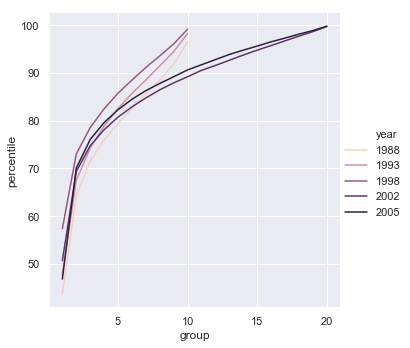

In [17]:
sns.relplot(x="group", y="percentile", kind="line", hue="year", legend="full", data=usa);

_Note:_ data comes as deciles or ventiles, depending on year

### Many countries at once

In [18]:
countries = ['USA', 'BRA', 'IND', 'CHN']

In [19]:
several = df.loc[df['contcod'].isin(countries)]

In [20]:
only2005 = several.loc[several['year'] == 2005]

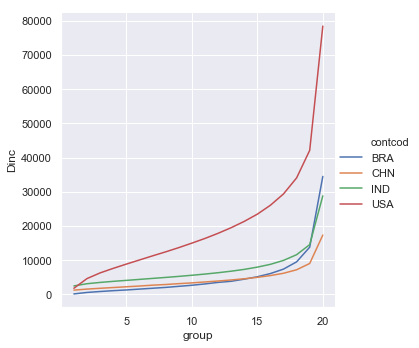

In [21]:
sns.relplot(x="group", y="Dinc", kind="line", hue="contcod", legend="full", data=only2005);

In [22]:
only2005['percentile'] = only2005.apply(lambda x: get_percentile(x['Dinc']), axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


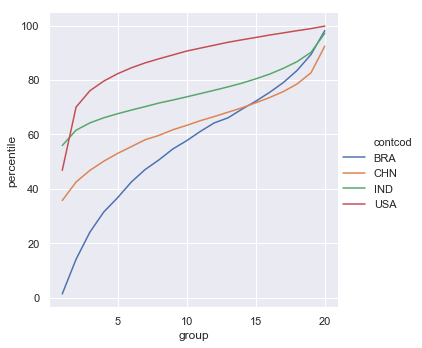

In [23]:
sns.relplot(x="group", y="percentile", kind="line", hue="contcod", legend="full", data=only2005);

*WARNING* -- the graph does not match WYD graph from Branko Milanovic -- India and China here start much higher than in the published chart. Without investigating I suspect there is some problem with PPP or data or currency conversion ratio somewhere. Will investigate.  

# Archive

Below can be removed soon

In [24]:
ago = df.loc[(df['country'] == '6')]

In [25]:
ago1 = df.loc[(df['country'] == '6') & (df['year'] == 1998)]

In [26]:
ago2 = df.loc[(df['country'] == '6') & (df['year'] == 2005)]

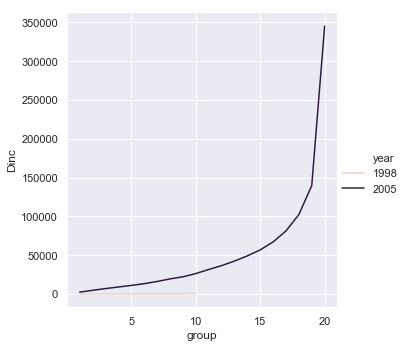

In [27]:
sns.relplot(x="group", y="Dinc", kind="line", hue="year", legend="full", data=ago);

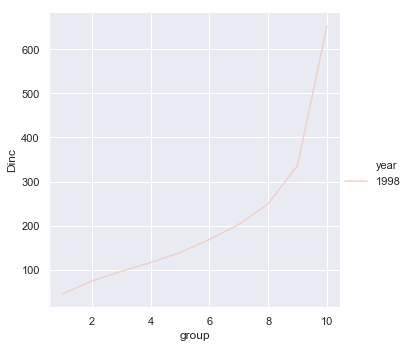

In [28]:
sns.relplot(x="group", y="Dinc", kind="line", hue="year", legend="full", data=ago1);

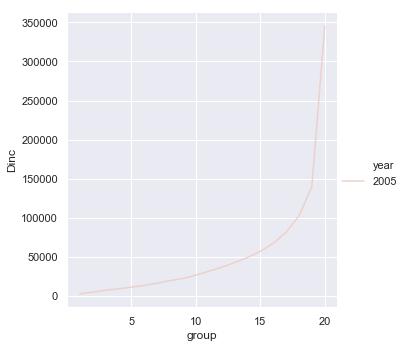

In [29]:
sns.relplot(x="group", y="Dinc", kind="line", hue="year", legend="full", data=ago2);

In [30]:
ago2['percentile'] = ago.apply(lambda x: get_percentile(x['Dinc']), axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
ago2.head(3)

,contcod,country,year,region,Dexpend,whole,group,Dinc,pop,percentile
10,AGO,6,2005,1,1,1,1,2378.265137,0.805,54.891449
11,AGO,6,2005,1,1,1,2,4695.801270,0.805,70.441166
12,AGO,6,2005,1,1,1,3,6907.961914,0.805,77.805072


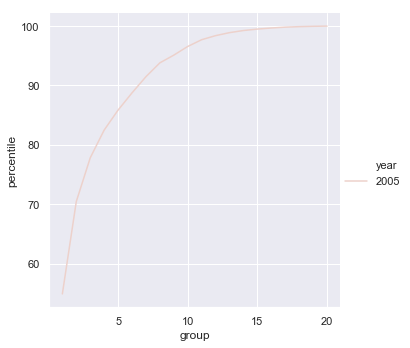

In [32]:
sns.relplot(x="group", y="percentile", kind="line", hue="year", legend="full", data=ago2);